# California Housing Prices dataset
Using StarLib data, predict the average house price by district.

From Hands-On Machine Learning (ch 2)

In [73]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [74]:
if (not os.path.isfile(os.path.join(HOUSING_PATH, "housing.csv"))):
    fetch_housing_data()

In [75]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [76]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [79]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


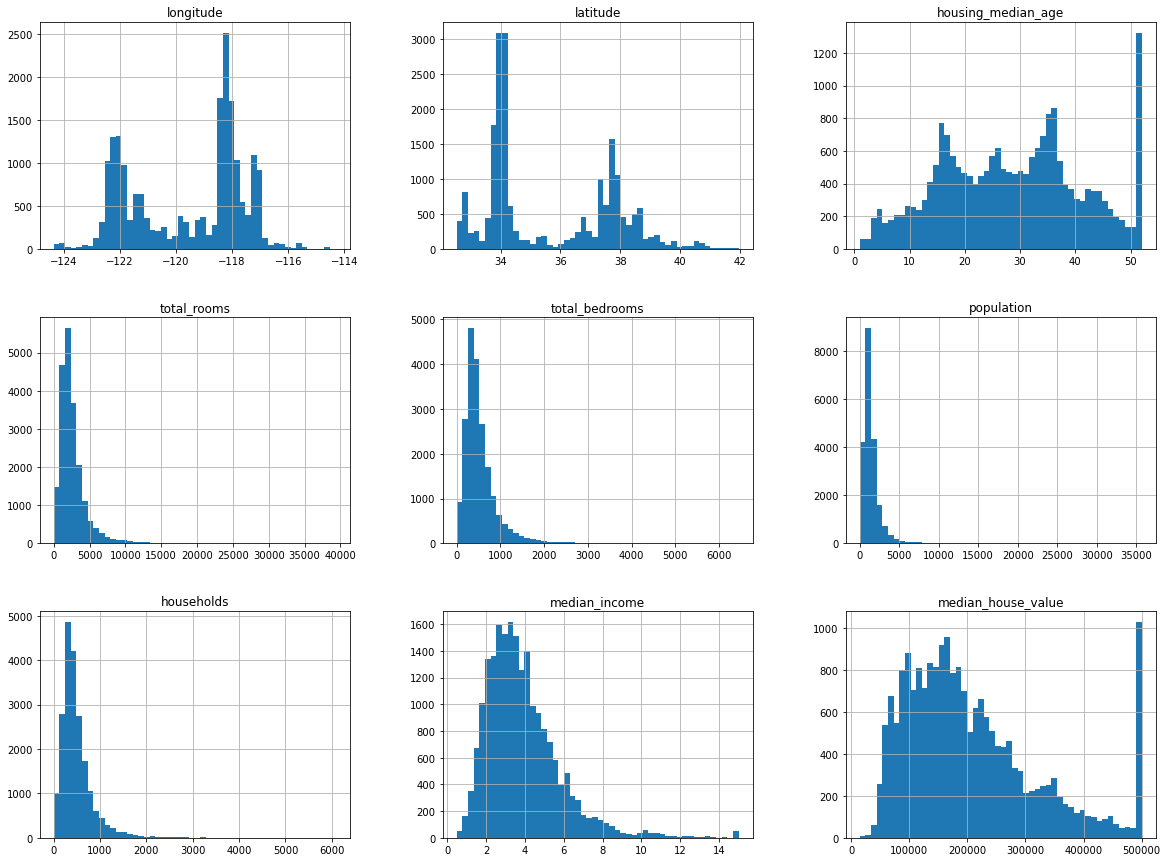

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [81]:
# randomly split test/train sets

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


<AxesSubplot:>

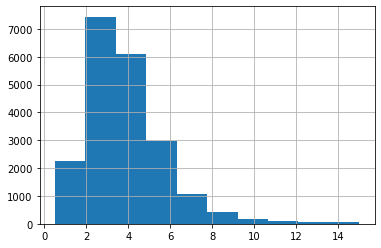

In [82]:
housing["median_income"].hist()

In [83]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

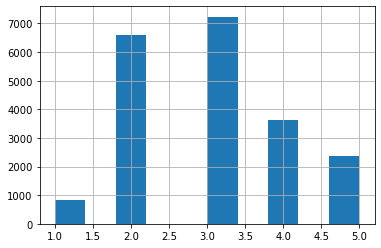

In [84]:
housing["income_cat"].hist()

In [85]:
# becuse the median income is likely an important feature
# split the test/train data with samples relative to the spread of income
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [86]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [87]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [88]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# recreate train/test set with income_cat
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.039971,0.364964,-0.243309
2,0.318847,0.318798,0.313711,-1.610697,-0.015195
3,0.350581,0.350533,0.367248,4.754008,-0.013820
4,0.176308,0.176357,0.163275,-7.392141,0.027480
5,0.114438,0.114583,0.115795,1.185436,0.127011


In [89]:
# remove income_cat from train/test data 
# because we don't need it any more
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore and visualise the data

In [90]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

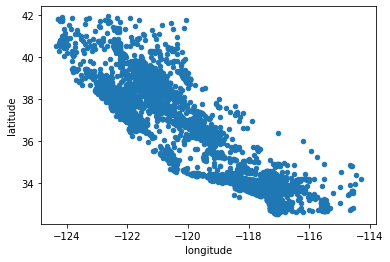

In [91]:
#plot the long/lat coordinates to see the geographical distribution
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

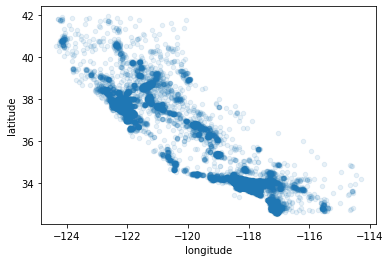

In [92]:
#let's get an idea of the density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

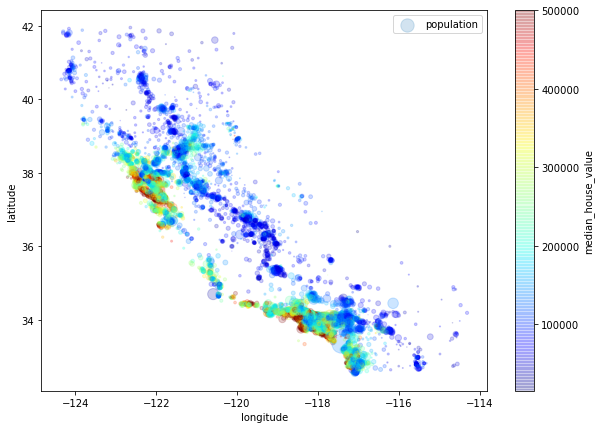

In [93]:
# include the prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [94]:
# Download the California image
images_path = "images"
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images/california.png', <http.client.HTTPMessage at 0x7f5dd2b51b80>)

<ipython-input-95-5dc3bddaabd9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


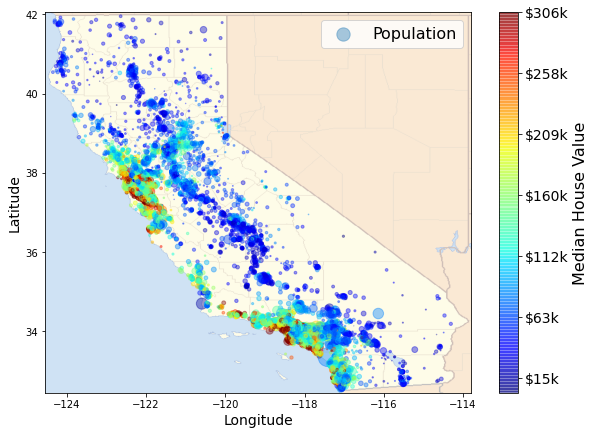

In [95]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [96]:
# let's look for correlations between attributes
# 1 positively correlated, -1 negatively correlated, 0 uncorrelated
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

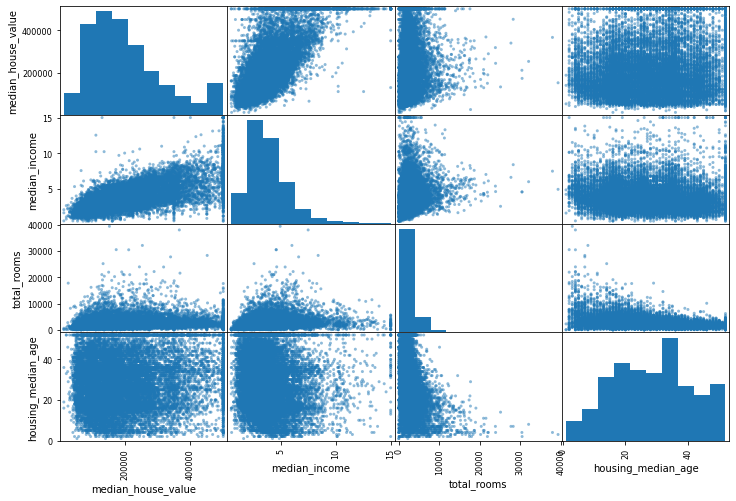

In [97]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 12.0, 0.0, 550000.0)

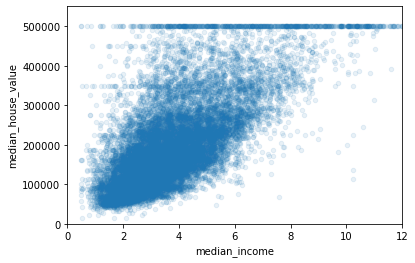

In [98]:
# median income vs median houe value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 12, 0, 550000])

Removing the districts associated with the 3 lines above may improve the model

(0.0, 12.0, 0.0, 550000.0)

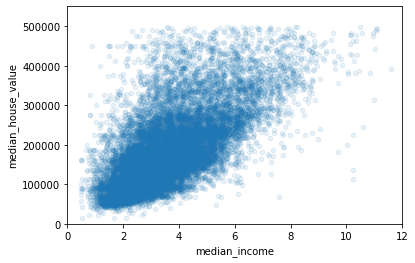

In [99]:
# let's drop the houses with a median_house_value of 500000 and try again
housing = housing.drop(housing.loc[(housing.median_house_value >= 500000) | (housing.median_house_value == 350000)].index)

# median income vs median houe value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 12, 0, 550000])

In [100]:
# create new attributes
# rooms per district isn't very useful, so rooms per house in a given district is better
#likewise population per house.
# bedrooms per room gives some idea of the density
# i've also added bedrooms per house

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [101]:
# let's look at the correlation witht these new attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.651697
total_rooms                 0.149734
rooms_per_household         0.110328
households                  0.098331
total_bedrooms              0.076792
housing_median_age          0.068532
population                  0.014617
population_per_household   -0.025157
longitude                  -0.040187
bedrooms_per_household     -0.059903
latitude                   -0.153392
bedrooms_per_room          -0.238160
Name: median_house_value, dtype: float64

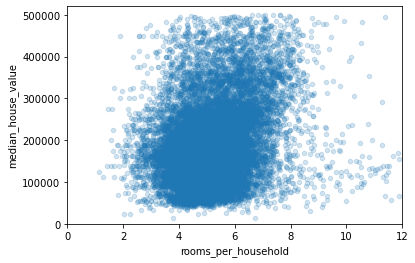

In [102]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 12, 0, 520000])
plt.show()

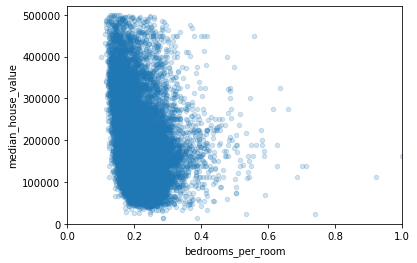

In [103]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 1, 0, 520000])
plt.show()

In [104]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,bedrooms_per_household,population_per_household
count,15638.000000,15638.000000,15638.000000,15638.000000,15485.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15485.000000,15485.000000,15638.000000
mean,-119.562090,35.656415,28.342371,2611.193695,537.407233,1437.614465,499.342371,3.678119,191238.220808,5.373656,0.214480,1.098439,3.094053
std,2.002898,2.153881,12.475382,2140.849018,415.102005,1127.540423,377.918552,1.567010,96749.421020,2.397723,0.055634,0.483738,11.207816
min,-124.350000,32.540000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.333333,0.692308
25%,-121.750000,33.930000,18.000000,1437.000000,297.000000,795.000000,281.000000,2.535200,116300.000000,4.422556,0.177534,1.005525,2.448803
50%,-118.520000,34.270000,28.000000,2105.000000,435.000000,1179.000000,410.000000,3.454250,172500.000000,5.192173,0.204368,1.048428,2.839432
75%,-118.000000,37.730000,37.000000,3117.000000,647.000000,1742.000000,603.000000,4.581000,245600.000000,5.975085,0.240597,1.098684,3.305810
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,499100.000000,132.533333,1.000000,34.066667,1243.333333


# Prepare the data for ML

In [105]:
# first let's revert back to clean data and seperate the target values

strat_train_set = strat_train_set.drop(strat_train_set.loc[(strat_train_set.median_house_value >= 500000) | (strat_train_set.median_house_value == 350000)].index)
strat_train_set.loc[strat_train_set['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [106]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,NOT_INLAND
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,NOT_INLAND
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,NOT_INLAND
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,NOT_INLAND


In [107]:
# replace missing values with median values (and save the median values for later use)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# we can't impute median values of non-numeric values, so make a copy first
housing_num = housing.select_dtypes(include=[np.number])

# calculate the values
imputer.fit(housing_num)

# they're saved here
imputer.statistics_

array([-118.52   ,   34.27   ,   28.     , 2105.     ,  435.     ,
       1179.     ,  410.     ,    3.45425])

In [108]:
# check they're the same 
housing_num.median().values

array([-118.52   ,   34.27   ,   28.     , 2105.     ,  435.     ,
       1179.     ,  410.     ,    3.45425])

In [109]:
# the replacement is done here, and we create the training set in the process
X = imputer.transform(housing_num)

In [110]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [111]:
housing_tr.loc[sample_incomplete_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,435.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,435.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,435.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,435.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,435.0,3468.0,1405.0,3.1662


In [112]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [113]:
# we have 1 categorical input to deal with
housing_cat = housing[['ocean_proximity']].copy()
housing_cat.head(10)

,ocean_proximity
17606,NOT_INLAND
18632,NOT_INLAND
14650,NOT_INLAND
3230,INLAND
3555,NOT_INLAND
19480,INLAND
13685,INLAND
4937,NOT_INLAND
16365,INLAND
19684,INLAND


In [114]:
# later we learn that only INLAND is really relevent, so let's convert ocean_proximity to 2 categories
housing_cat.loc[housing_cat['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"
housing_cat['ocean_proximity'].value_counts()

NOT_INLAND    10402
INLAND         5236
Name: ocean_proximity, dtype: int64

In [115]:
# the ocean proximity is an ordinal, the distance matters (based on the maps above)
# although we're not doing much with the order here
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [116]:
ordinal_encoder.categories_

[array(['INLAND', 'NOT_INLAND'], dtype=object)]

In [117]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # for a dense array
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [118]:
cat_encoder.categories_


[array(['INLAND', 'NOT_INLAND'], dtype=object)]

In [119]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [121]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,NOT_INLAND,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,NOT_INLAND,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NOT_INLAND,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,NOT_INLAND,4.50581,3.047847


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.1623081 ,  0.7584625 ,  0.77415967, ..., -0.3120924 ,
        -0.08919574,  0.13225535],
       [-1.1822798 ,  0.64703216, -1.14969062, ...,  0.26492374,
        -0.03444921, -0.87528252],
       [ 1.1793737 , -1.34014239,  0.21303667, ..., -0.47903131,
        -0.09530071,  0.40342601],
       ...,
       [ 0.9996284 , -0.82477703,  0.93448053, ..., -0.30780062,
         0.0877511 ,  0.47384158],
       [ 1.5788077 , -0.72727547, -1.55049277, ...,  0.40570998,
        -0.03136921, -0.55571693],
       [ 0.77494678, -0.85263462,  0.21303667, ...,  0.05503811,
         0.0637911 , -0.33383954]])

In [123]:
# one hot encode the categorical attributes, in a pipeline
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.1623081 ,  0.7584625 ,  0.77415967, ...,  0.13225535,
         0.        ,  1.        ],
       [-1.1822798 ,  0.64703216, -1.14969062, ..., -0.87528252,
         0.        ,  1.        ],
       [ 1.1793737 , -1.34014239,  0.21303667, ...,  0.40342601,
         0.        ,  1.        ],
       ...,
       [ 0.9996284 , -0.82477703,  0.93448053, ...,  0.47384158,
         1.        ,  0.        ],
       [ 1.5788077 , -0.72727547, -1.55049277, ..., -0.55571693,
         1.        ,  0.        ],
       [ 0.77494678, -0.85263462,  0.21303667, ..., -0.33383954,
         0.        ,  1.        ]])

# Let's do some training

In [124]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [125]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
# actual values
print("Labels:", list(some_labels))

Predictions: [198335.40439925 309331.07526996 196608.1202792   62379.02308059
 188962.66949238]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [126]:
# it works, but isn't too accurate
# let's check the RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

59429.10829801536

In [127]:
# and the MAE
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

43559.763009340786

It's not a great model, so let's try another

In [128]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [129]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [130]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.0

no errors, so it's overfitting.

In [131]:
# lets take a look at k-fold cross validation using the decision tree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [132]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [60810.05242103 64511.73788892 61745.32790344 61899.34155268
 63615.7942305  62284.49297554 62666.41960442 61579.69157378
 67338.15648841 64140.81816366]
Mean: 63059.18328023638
Standard deviation: 1815.8364151859057


In [133]:
# and now k-fold cross validation with the linear regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [57733.59033563 58691.59995976 62161.12515505 63985.40585679
 58889.65679264 60527.66457099 57320.86198105 58622.5319411
 60998.07066188 58167.01165065]
Mean: 59709.75189055454
Standard deviation: 2037.2159338491153


In [134]:
# ok, how about with a random forest ensemble?
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19785.547710282553

In [135]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47188.5605638  46116.96242982 46350.57190897 47762.80108021
 46261.23241559 48008.09035797 45407.04317068 45766.50653197
 48697.23989353 46326.71999271]
Mean: 46788.57283452443
Standard deviation: 1016.2130111708175


## Tuning hyperparameters

In [136]:
# hunt for hyperparameter values with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [50, 60, 70], 'max_features': [6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [60, 70], 'max_features': [6, 8, 10]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, 10],
                          'n_estimators': [50, 60, 70]},
                         {'bootstrap': [False], 'max_features': [6, 8, 10],
                          'n_estimators': [60, 70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [137]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 70}

In [138]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=70,
                      random_state=42)

In [139]:
cvres = grid_search.cv_results_
results = list(zip(cvres["mean_test_score"], cvres["params"]))
results.sort(key=lambda tup: tup[0], reverse=True)
for mean_score, params in results[:5]:
    print(np.sqrt(-mean_score), params)

43856.01949839484 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}
43906.2894271481 {'bootstrap': False, 'max_features': 6, 'n_estimators': 60}
44333.95225669123 {'bootstrap': False, 'max_features': 8, 'n_estimators': 70}
44349.89793144669 {'bootstrap': False, 'max_features': 8, 'n_estimators': 60}
44357.30069410358 {'max_features': 8, 'n_estimators': 70}


In [140]:
# as well as grid search, we can also try randomised search to identify hyperparameter values
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=50, high=100),
    'max_features': randint(low=5, high=11),
    'bootstrap': [False, True]
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [False, True],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5de8023df0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5de8086190>},
                   random_state=42, scoring='neg_mean_squared_error')

In [141]:
cvres = rnd_search.cv_results_
results = list(zip(cvres["mean_test_score"], cvres["params"]))
results.sort(key=lambda tup: tup[0], reverse=True)
for mean_score, params in results[:5]:
    print(np.sqrt(-mean_score), params)

43837.908715404825 {'bootstrap': False, 'max_features': 6, 'n_estimators': 73}
44105.85049145751 {'bootstrap': False, 'max_features': 7, 'n_estimators': 57}
44108.22459817894 {'bootstrap': False, 'max_features': 7, 'n_estimators': 73}
44221.93462081447 {'bootstrap': False, 'max_features': 8, 'n_estimators': 89}
44311.834936171115 {'bootstrap': False, 'max_features': 8, 'n_estimators': 78}


# Ensemble methods

In [142]:
# let's analyse the best models so far
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room", "bedrooms_per_household"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.326447475290151, 'median_income'),
 (0.10888383768978822, 'INLAND'),
 (0.10192940832624935, 'population_per_household'),
 (0.09108812812707433, 'bedrooms_per_household'),
 (0.08886134378335722, 'longitude'),
 (0.07736495355002039, 'latitude'),
 (0.06202369153009833, 'bedrooms_per_room'),
 (0.03890436105876373, 'housing_median_age'),
 (0.03677545587182351, 'rooms_per_household'),
 (0.01735039173247464, 'total_rooms'),
 (0.016917365058517302, 'total_bedrooms'),
 (0.016864464320763734, 'population'),
 (0.016589123660918196, 'households')]

In [144]:
final_model = grid_search.best_estimator_

strat_test_set = strat_test_set.drop(strat_test_set.loc[(strat_test_set.median_house_value >= 500000) | (strat_test_set.median_house_value == 350000)].index)
strat_test_set.loc[strat_test_set['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

42972.32498184179

In [145]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([41092.12519967, 44773.6381732 ])